In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
books =pd.read_csv('/Applications/Python 3.11/bestsellers with categories.csv')

In [5]:
books.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
genre_counts=books.Genre.value_counts()
genre_counts

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

<Axes: title={'center': 'Fiction vs Non Fiction'}, xlabel='Genre', ylabel='count'>

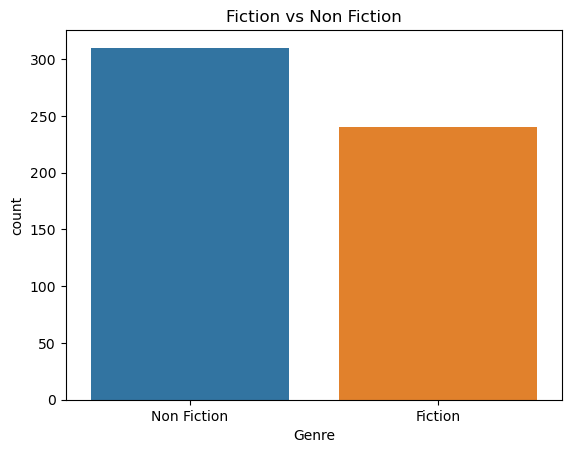

In [9]:
plt.title('Fiction vs Non Fiction')
sns.countplot(x='Genre', data=books)

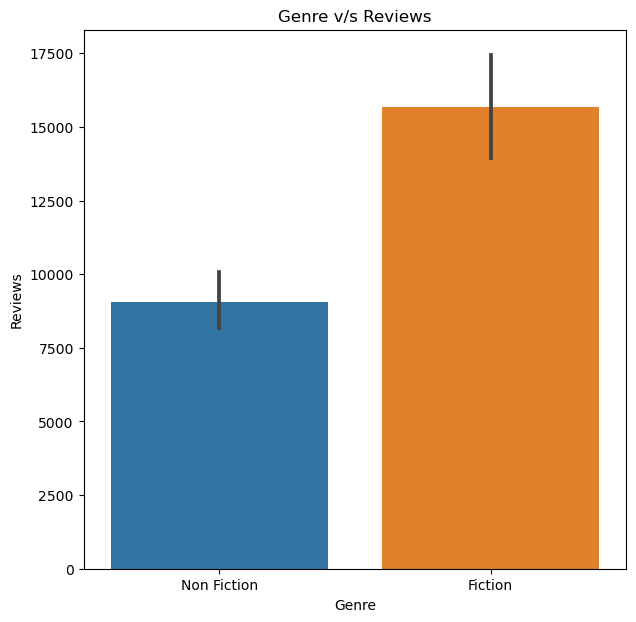

In [10]:
plt.figure(figsize=(7,7))
plt.title("Genre v/s Reviews")
sns.barplot(x = 'Genre',
            y = 'Reviews',
            data = books);

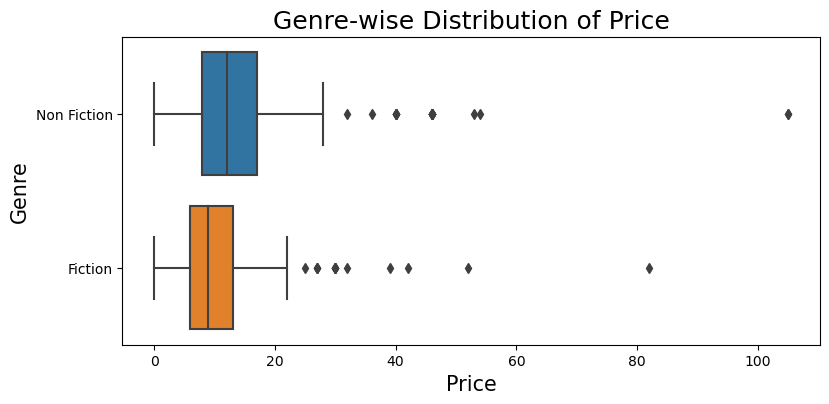

In [11]:
plt.figure(figsize = (9,4))
sns.boxplot(data =books,x = 'Price',y ="Genre")
plt.title("Genre-wise Distribution of Price", fontsize = 18)
plt.ylabel("Genre", fontsize = 15)
plt.xlabel("Price",fontsize = 15)
plt.show()

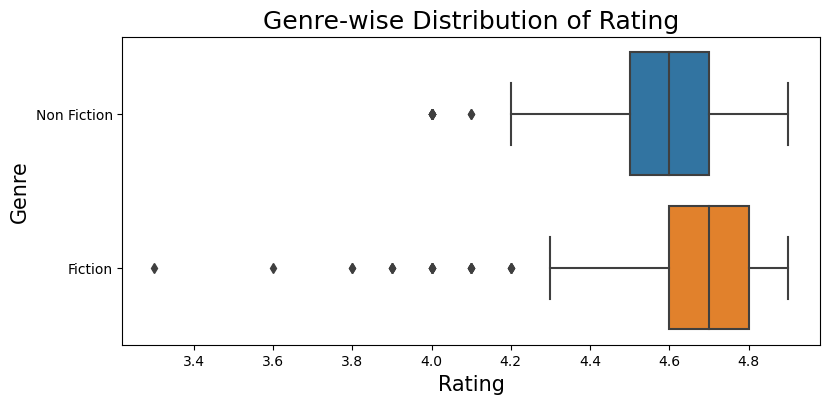

In [12]:
plt.figure(figsize = (9,4))
sns.boxplot(data =books,x = 'User Rating',y ="Genre")
plt.title("Genre-wise Distribution of Rating", fontsize = 18)
plt.ylabel("Genre", fontsize = 15)
plt.xlabel("Rating",fontsize = 15)
plt.show()

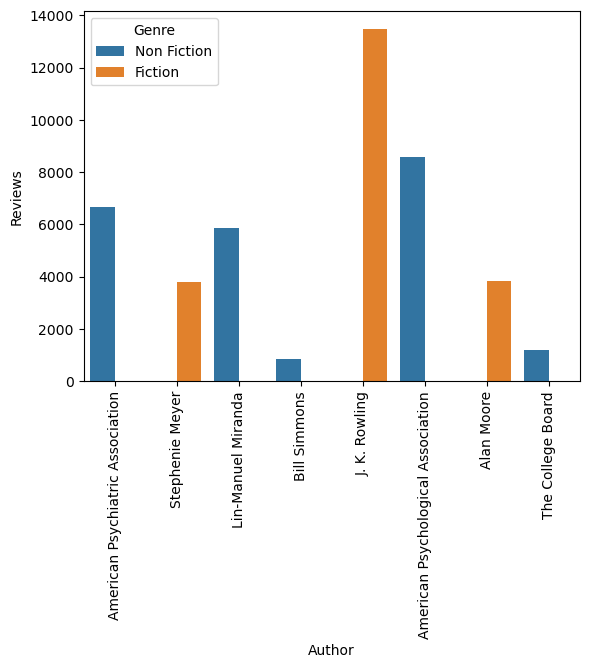

In [13]:
books_price = books.sort_values("Price", ascending= False)[['Author', 'Price', 'Genre', 'Reviews']].head(20)
plt.xticks(rotation = 90)   
sns.barplot(x = 'Author', 
            y = 'Reviews', 
            data = books_price, hue = "Genre");

In [14]:
books_price

,Author,Price,Genre,Reviews
69,American Psychiatric Association,105,Non Fiction,6679
70,American Psychiatric Association,105,Non Fiction,6679
473,Stephenie Meyer,82,Fiction,3801
151,Lin-Manuel Miranda,54,Non Fiction,5867
346,Bill Simmons,53,Non Fiction,858
159,J. K. Rowling,52,Fiction,13471
273,American Psychological Association,46,Non Fiction,8580
271,American Psychological Association,46,Non Fiction,8580
272,American Psychological Association,46,Non Fiction,8580
275,American Psychological Association,46,Non Fiction,8580


In [15]:
books_price.drop_duplicates()

,Author,Price,Genre,Reviews
69,American Psychiatric Association,105,Non Fiction,6679
473,Stephenie Meyer,82,Fiction,3801
151,Lin-Manuel Miranda,54,Non Fiction,5867
346,Bill Simmons,53,Non Fiction,858
159,J. K. Rowling,52,Fiction,13471
273,American Psychological Association,46,Non Fiction,8580
524,Alan Moore,42,Fiction,3829
439,The College Board,40,Non Fiction,1201


Aggregate info about reviews:

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64



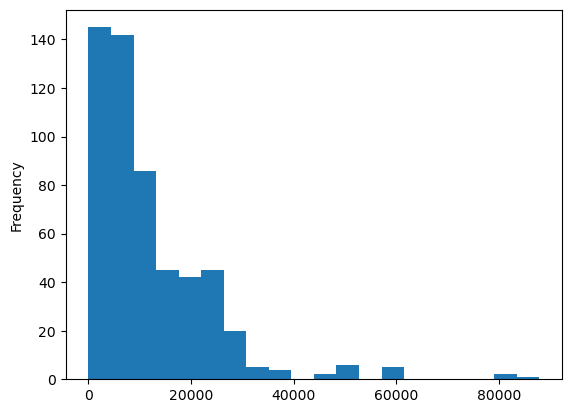

In [16]:
books.Reviews.plot(bins=20, kind='hist')

print("Aggregate info about reviews:")
print()
print(books.Reviews.describe())
print()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64



<Axes: ylabel='Frequency'>

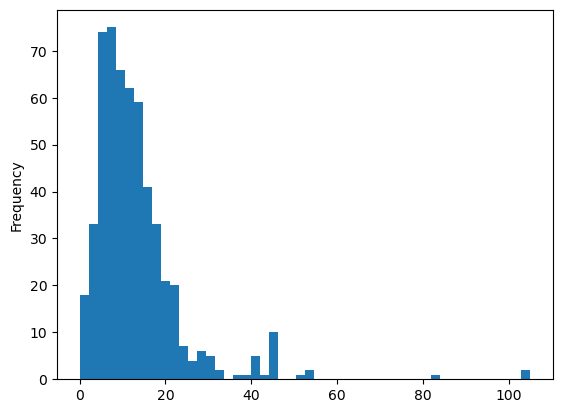

In [17]:
print(books.Price.describe())
print()
books.Price.plot(bins=50, kind='hist')

In [18]:
books.Price.value_counts()[0]

12

In [19]:
books['Price'] = books['Price'].map( lambda x : books.Price.median() if x == 0 else x)


In [20]:
books.Price.min()

1.0

In [21]:
df_fiction=books[books["Genre"]=="Fiction"]
df_nonfiction=books[books["Genre"]=="Non Fiction"]

In [22]:
df_fiction.Author.value_counts()

Jeff Kinney         12
Suzanne Collins     11
Rick Riordan        11
Dr. Seuss            9
Stephenie Meyer      7
                    ..
Gayle Forman         1
Mary Ann Shaffer     1
Margaret Atwood      1
Jonathan Cahn        1
Angie Thomas         1
Name: Author, Length: 91, dtype: int64

In [23]:
df_nonfiction.Author.value_counts()

Gary Chapman                          11
American Psychological Association    10
Gallup                                 9
Rob Elliott                            8
Bill O'Reilly                          7
                                      ..
David Perlmutter MD                    1
Pretty Simple Press                    1
Sarah Palin                            1
Brian Kilmeade                         1
Rob Bell                               1
Name: Author, Length: 159, dtype: int64

In [24]:
books['PriceRange'] = pd.cut(books['Price'], 3,labels=['low range <= $35','mid range<=$70','high range <=$150'])
books[['PriceRange', 'Reviews']].groupby(['PriceRange'], as_index=False).mean().sort_values(by='PriceRange', ascending=True)

,PriceRange,Reviews
0,low range <= $35,12176.254753
1,mid range<=$70,7258.857143
2,high range <=$150,5719.666667


(0.0, 50000.0)

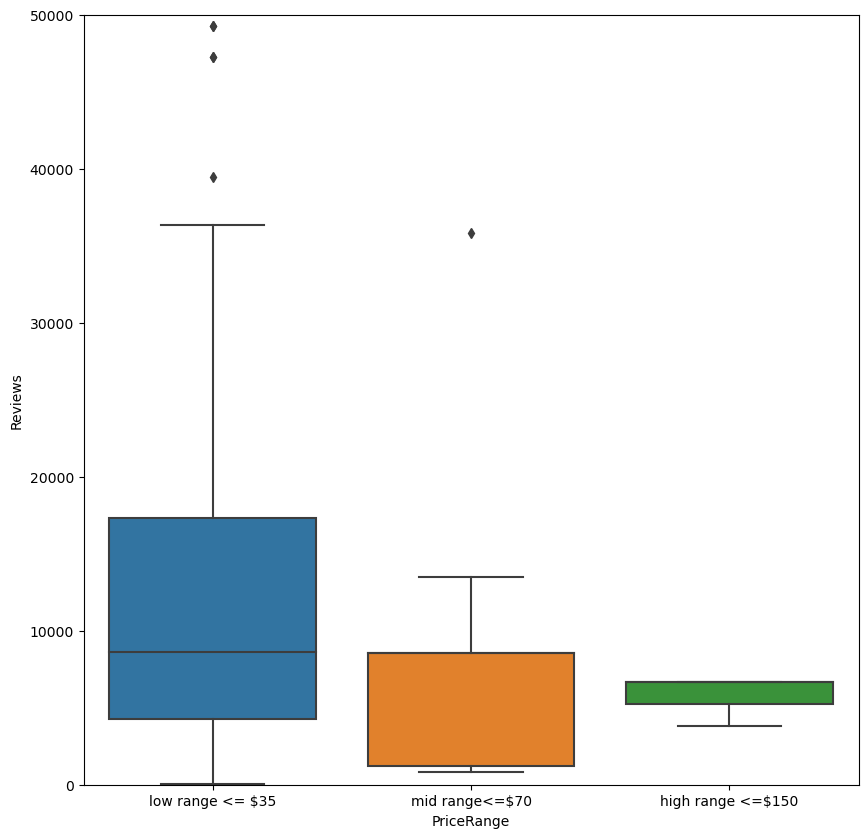

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x=books['PriceRange'],y=books['Reviews'])
plt.ylim(0, 50000)